# Single image model testing

In [482]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import sys
%matplotlib inline

DIRECTORY  ='positive_images'

def show_image(frame):
    # Keep things in BGR up to the point of plotting
    plt.imshow(
        cv2.cvtColor(frame, cv2.COLOR_BGR2RGB),
        cmap='gray'
    )
    plt.show()

def get_random_positive_image():
    file = random.sample(os.listdir(DIRECTORY), 1)[0]
    frame = cv2.imread(os.path.join(DIRECTORY, file))
    return frame


In [483]:
model = cv2.CascadeClassifier('default_models/cascade_hammy_any_eye.xml')

def get_eye_rects(frame, model=model):

    rects = model.detectMultiScale3(
        frame,
        1.1,
        12,
        outputRejectLevels=True
    )

    return sorted(tuple(zip(rects[0],[x[0] for x in rects[2]])), key=lambda x: -x[1])[:2]


def draw_cat_face(frame, rects):
    rects = tuple((x, y, w, h) for (x, y, w, h), conf in rects)

    if len(rects) != 2:
        return

    le = rects[int(rects[0][0] >= rects[1][0])]
    re = rects[int(rects[0][0] < rects[1][0])]

    cle = np.array((int(le[0] + 0.5 * le[2]), int(le[1] + 0.5 * le[3])))
    cre = np.array((int(re[0] + 0.5 * re[2]), int(re[1] + 0.5 * re[3])))

    cf = (int((cle[0] + cre[0]) / 2), int(((cle[1] + cre[1]) / 2) + re[3]/4))
    rf = int(np.linalg.norm(cre - cle))

    cv2.circle(frame, cre, int(re[2]/2), color=(0, 0, 255), thickness=6)
    cv2.circle(frame, cle, int(le[2]/2), color=(0, 255, 0), thickness=6)
    cv2.circle(frame, cf, rf, color=(255, 0, 0), thickness=7)


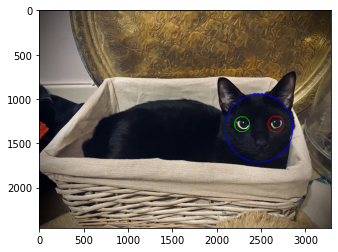

In [484]:
frame = get_random_positive_image()
eyes = get_eye_rects(frame)
draw_cat_face(frame, eyes)

show_image(frame)
